## YOLO

In [4]:
from ultralytics import YOLO

In [5]:
import torch
import cv2
import os
from PIL import Image
import matplotlib.pyplot as plt

# Load YOLOv5 model (using a pre-trained model from Ultralytics)
model = torch.hub.load("ultralytics/yolov5", "yolov5s")

# Define the dataset directory
dataset_dir = 'images'
categories = ['angry', 'happy', 'relaxed', 'sad']

# Create a directory to save the output images
output_dir = 'yolo_output'
os.makedirs(output_dir, exist_ok=True)

Using cache found in /Users/leon0215/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 2024-5-22 Python-3.9.10 torch-2.3.0 CPU

Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 


In [6]:
import torch
import cv2
import matplotlib.pyplot as plt
from PIL import Image

# Define the path to your image
image_path = 'images/angry/44281000_ad93ff730e_b.jpg'

# Function to run YOLOv5 on a single image
def run_yolo_and_crop(image_path):
    # Load image
    img = cv2.imread(image_path)
    # Perform inference
    results = model(img)
    # Parse results
    detected_objects = results.pandas().xyxy[0]
    # Initialize list to store cropped images
    cropped_images = []
    
    for index, row in detected_objects.iterrows():
        if row['name'] == 'dog':  # Filter to only detect dogs
            x1, y1, x2, y2 = int(row['xmin']), int(row['ymin']), int(row['xmax']), int(row['ymax'])
            # Crop the image to the bounding box
            cropped_img = img[y1:y2, x1:x2]
            cropped_images.append(cropped_img)
            # Optionally, draw bounding box on the original image
            cv2.rectangle(img, (x1, y1), (x2, y2), (255, 0, 0), 2)
            cv2.putText(img, f"{row['name']} {row['confidence']:.2f}", (x1, y1 - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.9, (255, 0, 0), 2)
    
    return img, cropped_images, detected_objects


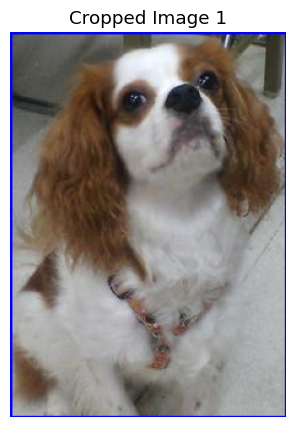

In [7]:
%matplotlib inline
# Run YOLO on the image and crop the detected regions
detected_img, cropped_images, detections = run_yolo_and_crop(image_path)

# Display the cropped images
for i, cropped_img in enumerate(cropped_images):
    cropped_img_rgb = cv2.cvtColor(cropped_img, cv2.COLOR_BGR2RGB)
    plt.figure(figsize=(5, 5))
    plt.imshow(cropped_img_rgb)
    plt.axis('off')  # Hide the axis
    plt.title(f'Cropped Image {i+1}')
    plt.show()

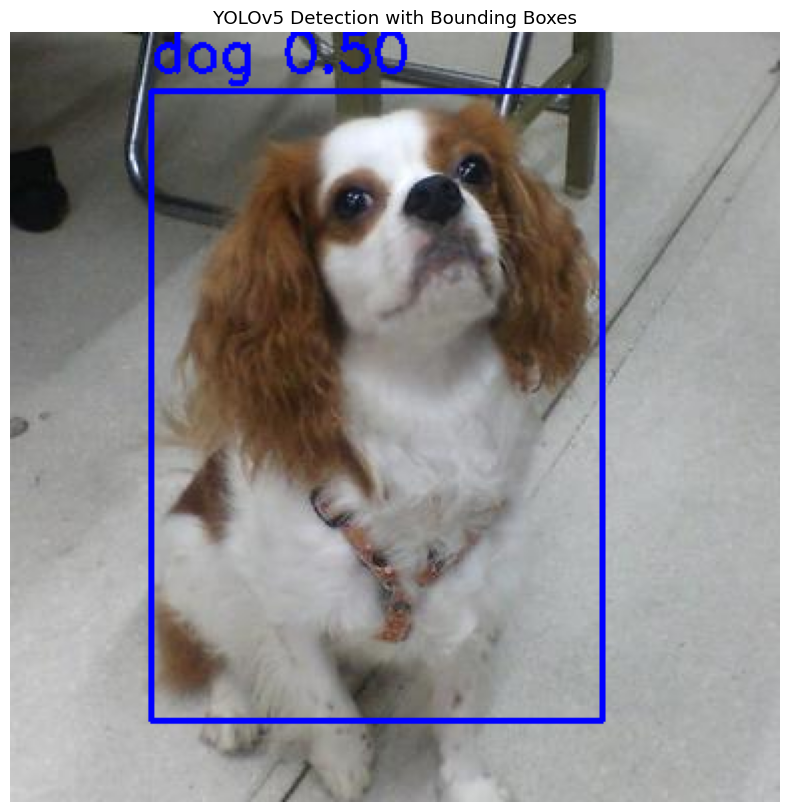

In [8]:
# Optionally, display the original image with bounding boxes
detected_img_rgb = cv2.cvtColor(detected_img, cv2.COLOR_BGR2RGB)
plt.figure(figsize=(10, 10))
plt.imshow(detected_img_rgb)
plt.axis('off')  # Hide the axis
plt.title('YOLOv5 Detection with Bounding Boxes')
plt.show()


In [18]:
print(detections)

       xmin  ymin   xmax        ymax  confidence  class name
0  6.008808   0.0  384.0  376.373779    0.317481     16  dog
